In [47]:
import pytz
import plotly.express as px
import seaborn as sns
from datetime import datetime
from heatmap import corrplot
from datetime import timezone
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import holidays
%matplotlib inline

# Calendar

In [52]:
calendar60 = pd.read_csv("../../RDN/Load Data (2018-2019)/artifacts/time_15min.csv", index_col=0)
calendar15 = pd.read_csv("../../RDN/Load Data (2018-2019)/artifacts/time_15min.csv", index_col=0)


In [53]:
calendar60.head(3)

datetime  year  month  day  hour  minute  second  weekday  \
0  2018-01-01 00:00:00  2018      1    1     0       0       0        0   
1  2018-01-01 00:15:00  2018      1    1     0      15       0        0   
2  2018-01-01 00:30:00  2018      1    1     0      30       0        0   

   weekend   timestamp  holiday  
0     True  1514764800     True  
1     True  1514765700     True  
2     True  1514766600     True

c:\Ubuntu\Dev\Windows\I-NERGY\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


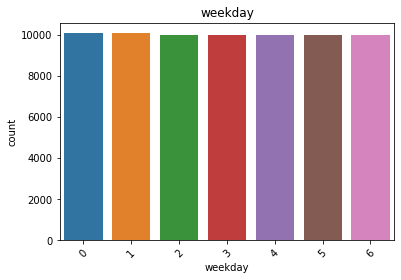

c:\Ubuntu\Dev\Windows\I-NERGY\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


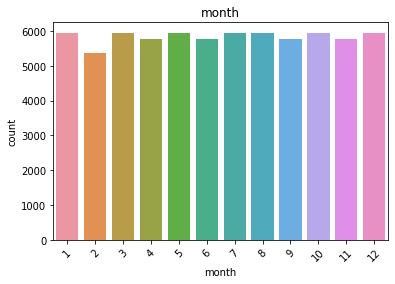

c:\Ubuntu\Dev\Windows\I-NERGY\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


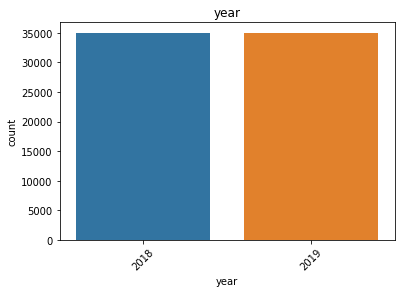

c:\Ubuntu\Dev\Windows\I-NERGY\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


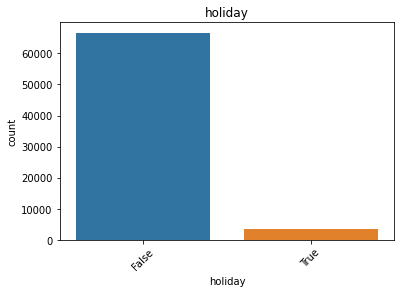

In [54]:
for col in ['weekday', 'month', 'year', 'holiday']:
    sns.countplot(calendar60[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()


1. We have data for all the weekdays without almost equal counts which is expected.
2. Month data quantity is fluctuating according to fluctuation of number of days of each month (28, 30. 31)
3. The year distribution looks OK as we have equal data samples from 2018 and 2019.
4. Same thing for holidays.

# Timeseries (hourly)

In [56]:
ts60 = pd.read_csv("../../RDN/Load Data (2018-2019)/artifacts/load_60min.csv", index_col=0, parse_dates=True)

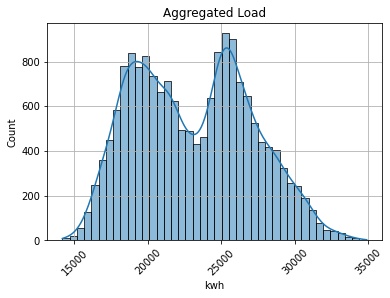

In [58]:
ax = sns.histplot(x=ts60['Load'], kde=True)
plt.xticks(rotation=45)
ax.set(xlabel='kwh', title='Aggregated Load')
plt.grid()

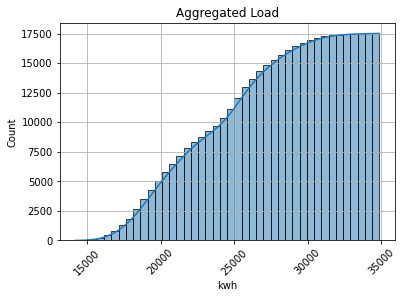

In [59]:
ax = sns.histplot(x=ts60['Load'], kde=True, cumulative=True)
plt.xticks(rotation=45)
ax.set(xlabel='kwh', title='Aggregated Load')
plt.grid()


In [61]:
fig = px.line(ts60, title='Aggregated Load (kwh)')
fig.show()


Load [kWh]:


<AxesSubplot:xlabel='weekend'>

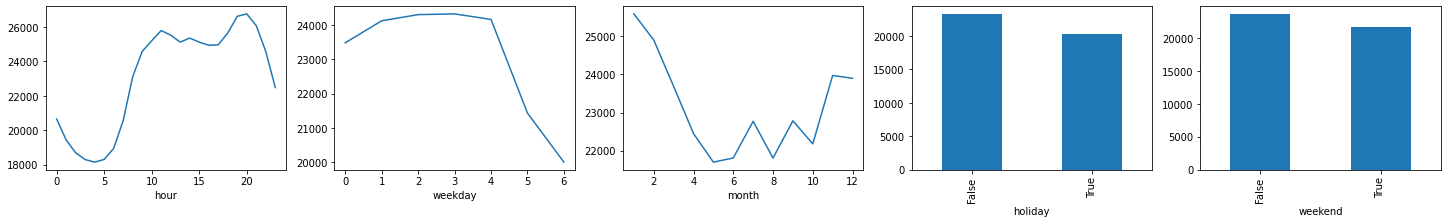

In [66]:
fig, axes = plt.subplots(1, 5)
print('Load [kWh]:')
ts60_plus_time.groupby('hour')['Load'].mean().plot(ax=axes[0], figsize=(25, 4))
ts60_plus_time.groupby('weekday')['Load'].mean().plot(ax=axes[1], figsize=(25, 3))
ts60_plus_time.groupby('month')['Load'].mean().plot(ax=axes[2], figsize=(25, 3))
ts60_plus_time.groupby('holiday')['Load'].mean().plot.bar(ax=axes[3], figsize=(25, 3))
ts60_plus_time.groupby('weekend')['Load'].mean().plot.bar(ax=axes[4], figsize=(25, 3))


**Observations: **
1. Load peaks are observed mainly during the afternoon until 21.00
2. Working days exhibit the highest of loads
3. The total loads are much higher during the winter monts. May and June have the lowest mean value (probably due to the abscence of both cooling and heating loads)
4. Holidays weekends and working days clearly lead to reduction of the mean values of the total load

# Initial Time Series Analysis 
## ACF / PACF

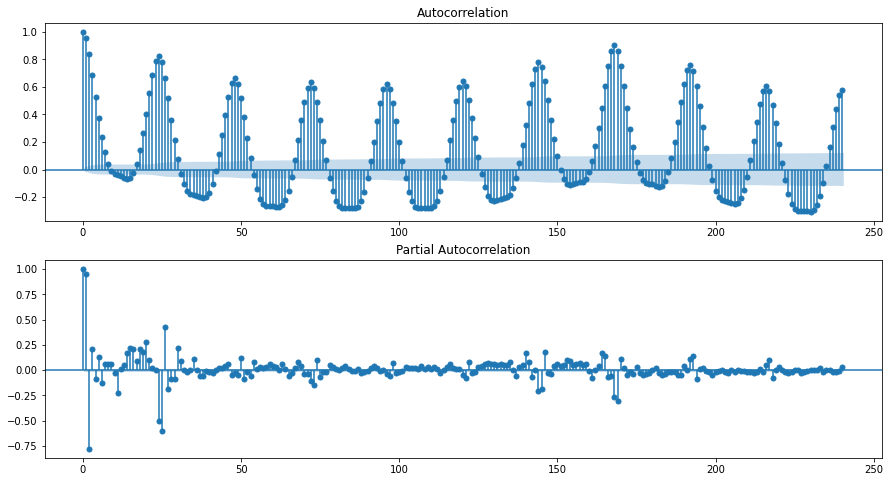

In [74]:
import statsmodels.api as sm
fig, ax = plt.subplots(2,1, figsize=(15, 8))
fig = sm.graphics.tsa.plot_acf(ts60['Load'], lags=24*10, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(ts60['Load'], lags=24*10, ax=ax[1])
plt.show()


In [75]:
Both plots demonstrate the need for both daily and weekly AR (PACF) and MA (ACF) terms.

SyntaxError: invalid syntax (Temp/ipykernel_30776/899814768.py, line 1)

## Example decomposition to capture daily seasonality

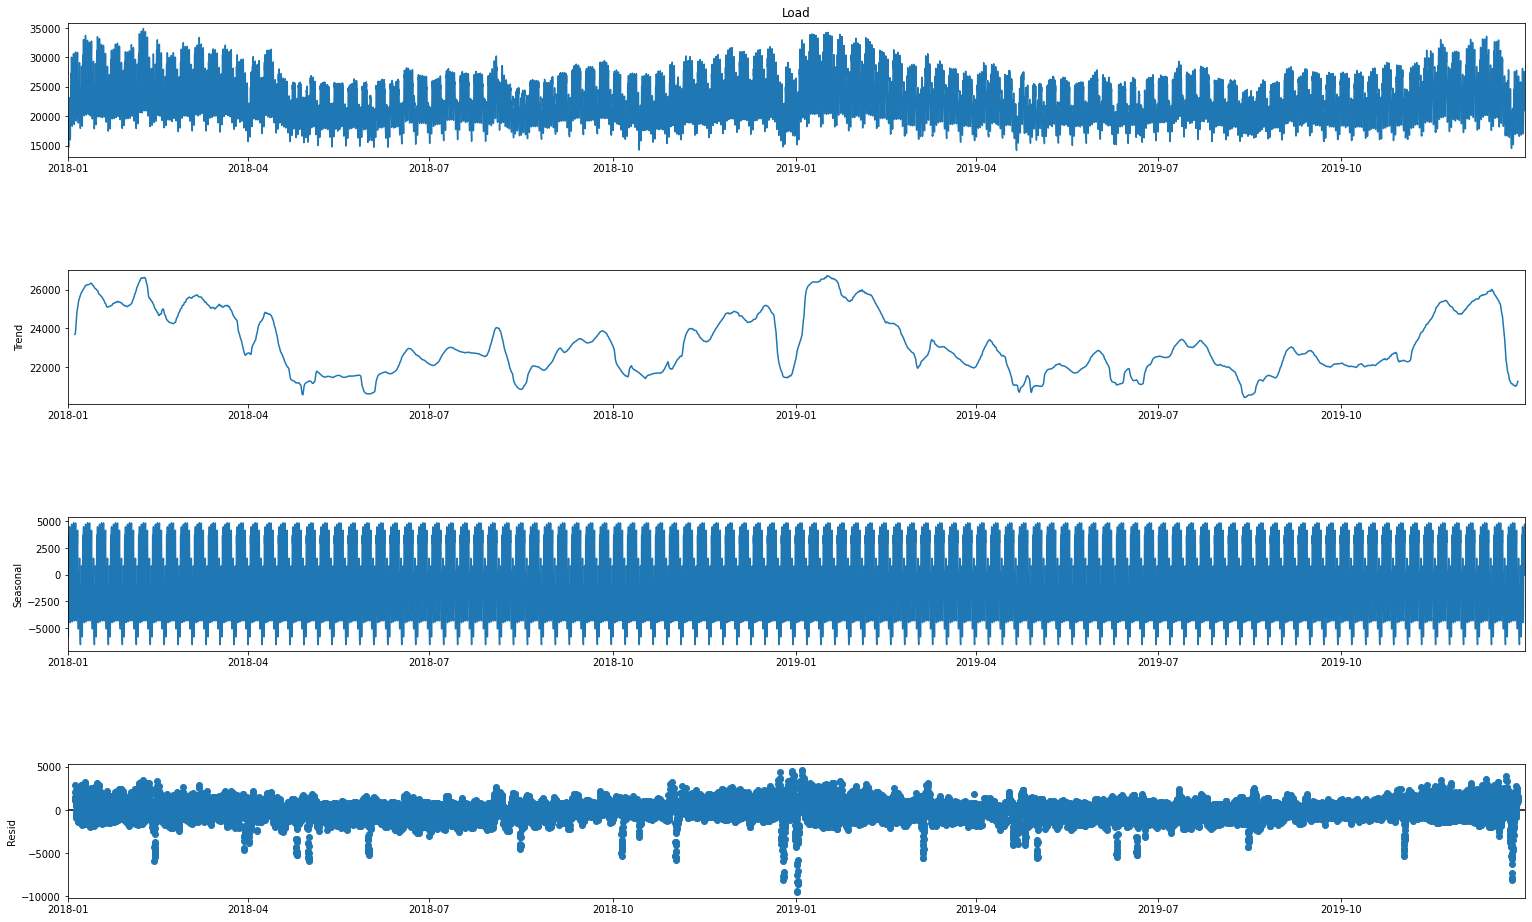

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts60['Load'],  model='additive', period=24)
f = result.plot()
f.set_figheight(15)
f.set_figwidth(25)
plt.show()

This decomposition plots are not sufficient as we expect seasonal patterns of daily (24 timesteps), weekly (7x24 timesteps) and yearly (365x24 timesteps) periods. The rest of the analysis will take place in the R notebook. R_rdn_time_series_analysis.ipynb